In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [2]:
dataframe = pd.read_csv('mobile_price_data.csv')
dataframe.head()

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)","₹8,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
1,"Realme Narzo 10A (So Blue, 32 GB)","₹8,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
2,"Realme Narzo 10A (So Blue, 64 GB)","₹9,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
3,"Realme Narzo 10A (So White, 64 GB)","₹9,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
4,"Realme Narzo 10 (That Green, 128 GB)","₹11,999",That Green,Dual Sim,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,128 GB,4 GB,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75.4 mm,164.4 mm,9 mm,199 g


In [3]:
dataframe.drop_duplicates(inplace=True)

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 0 to 447
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   mobile_name    406 non-null    object
 1   mobile_price   406 non-null    object
 2   mobile_color   406 non-null    object
 3   dual_sim       406 non-null    object
 4   disp_size      406 non-null    object
 5   resolution     406 non-null    object
 6   os             406 non-null    object
 7   num_cores      406 non-null    object
 8   mp_speed       406 non-null    object
 9   int_memory     406 non-null    object
 10  ram            406 non-null    object
 11  p_cam          406 non-null    object
 12  f_cam          406 non-null    object
 13  network        406 non-null    object
 14  bluetooth      406 non-null    object
 15  battery_power  406 non-null    object
 16  mob_width      406 non-null    object
 17  mob_height     406 non-null    object
 18  mob_depth      406 non-null   

In [5]:
dataframe.columns

Index(['mobile_name', 'mobile_price', 'mobile_color', 'dual_sim', 'disp_size',
       'resolution', 'os', 'num_cores', 'mp_speed', 'int_memory', 'ram',
       'p_cam', 'f_cam', 'network', 'bluetooth', 'battery_power', 'mob_width',
       'mob_height', 'mob_depth', 'mob_weight'],
      dtype='object')

In [6]:
dataframe.drop(['mobile_name','mobile_color','bluetooth'],axis=1,inplace = True)

In [7]:
def numericize(dataframe,col):
    return pd.to_numeric(dataframe[col].str.replace('[a-zA-Z]','',regex=True))
dataframe['mp_speed'] = numericize(dataframe,'mp_speed')
dataframe['int_memory'] = numericize(dataframe,'int_memory')
dataframe['ram'] = numericize(dataframe,'ram')
dataframe['battery_power'] = numericize(dataframe,'battery_power')
dataframe['mob_width'] = numericize(dataframe,'mob_width')
dataframe['mob_height'] = numericize(dataframe,'mob_height')
dataframe['mob_depth'] = numericize(dataframe,'mob_depth')
dataframe['mob_weight'] = numericize(dataframe,'mob_weight')
dataframe['mobile_price'] = dataframe['mobile_price'].replace('\D', '', regex=True).astype(int)

In [8]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in dataframe.select_dtypes(exclude = np.number):
    dataframe[col] = le.fit_transform(dataframe[col])

In [9]:
dataframe.corr()

,mobile_price,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight
mobile_price,1.000000,-0.015311,0.405834,0.179154,-0.145818,-0.119140,0.605886,0.763518,0.767308,0.312339,-0.163709,0.140214,-0.007744,0.084071,0.087873,-0.120982,0.385553
dual_sim,-0.015311,1.000000,-0.109230,-0.009857,-0.089523,0.245408,0.025110,-0.054644,-0.069951,-0.025031,0.011499,-0.088787,-0.092267,-0.001749,-0.052860,-0.010758,-0.101577
disp_size,0.405834,-0.109230,1.000000,0.443661,-0.177461,-0.290614,0.453241,0.457805,0.490281,0.494820,-0.193719,0.521894,0.594415,-0.018000,0.363951,-0.018065,0.760431
resolution,0.179154,-0.009857,0.443661,1.000000,-0.078747,-0.065641,0.196843,0.189762,0.279424,0.314721,-0.268641,0.129417,0.248662,0.018231,0.082970,0.003707,0.385676
os,-0.145818,-0.089523,-0.177461,-0.078747,1.000000,-0.085979,-0.033671,-0.146241,-0.182480,-0.221424,0.093296,-0.420747,-0.082372,-0.141464,-0.040158,0.095917,-0.170120
num_cores,-0.119140,0.245408,-0.290614,-0.065641,-0.085979,1.000000,-0.305592,-0.183264,-0.205943,0.023970,0.125163,-0.109915,-0.335435,0.141367,-0.386104,0.086161,-0.336802
mp_speed,0.605886,0.025110,0.453241,0.196843,-0.033671,-0.305592,1.000000,0.572689,0.582441,0.244018,-0.141041,0.106689,0.191224,0.001427,0.186679,-0.048959,0.535611
int_memory,0.763518,-0.054644,0.457805,0.189762,-0.146241,-0.183264,0.572689,1.000000,0.785240,0.362448,-0.224600,0.202898,0.159605,0.046594,0.142044,-0.078864,0.474162
ram,0.767308,-0.069951,0.490281,0.279424,-0.182480,-0.205943,0.582441,0.785240,1.000000,0.449390,-0.280897,0.242848,0.107400,0.051346,0.197621,-0.126678,0.511347
p_cam,0.312339,-0.025031,0.494820,0.314721,-0.221424,0.023970,0.244018,0.362448,0.449390,1.000000,-0.293121,0.363332,0.154028,-0.020278,0.105816,0.005461,0.424100


<AxesSubplot:ylabel='mobile_price'>

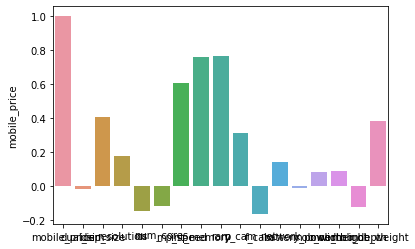

In [10]:
sns.barplot(x=dataframe.corr().columns, y = dataframe.corr()['mobile_price'])

In [11]:
dataframe.drop(['dual_sim','battery_power'],axis=1,inplace=True)

In [12]:
dataframe.drop_duplicates(inplace = True)

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [14]:
X_data = dataframe.iloc[:,1:15]
Y_data = dataframe.iloc[:,0]
ss = StandardScaler()
X_data = ss.fit_transform(X_data)


In [15]:
lr = LinearRegression()
cross_val_score(LinearRegression(),X_data,Y_data).mean()


0.4310231365394781

In [16]:
cross_val_score(Lasso(),X_data,Y_data).mean()

0.4334623247596584

In [17]:
cross_val_score(Ridge(),X_data,Y_data).mean()

0.4619533786479342

In [18]:
rid = Ridge()
rid.fit(X_data,Y_data)

Ridge()

In [19]:
rid.predict(ss.transform([X_data[10]]))

D:\Softwares\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([35245.72455578])

In [20]:
Y_data[10]

35999